In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

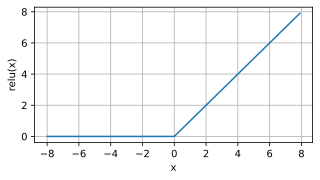

In [9]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

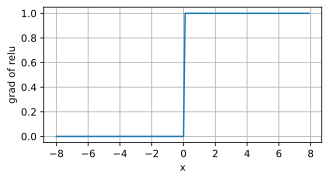

In [10]:
y.backward(torch.ones_like(y), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

In [6]:
#backward测试
#reference source: https://blog.csdn.net/sinat_28731575/article/details/90342082
#总之，对标量求导不需要维持计算图，不需要其他任何参数。当对矩阵和向量求导，就要两个参数。
import torch
import torch.nn as nn

x = torch.tensor([2, 3, 4], dtype=torch.float, requires_grad=True)
print(x)
y = x * 2
while y.norm() < 1000:
    y = y * 2
print(y)

y.backward(torch.ones_like(y))
print(x.grad)


tensor([2., 3., 4.], requires_grad=True)
tensor([ 512.,  768., 1024.], grad_fn=<MulBackward0>)
tensor([256., 256., 256.])


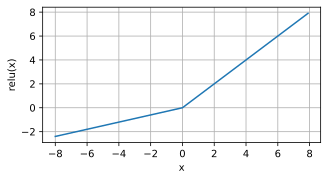

In [14]:
#pRELU
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.prelu(x,weight=torch.tensor(0.3))
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

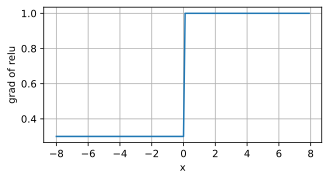

In [15]:
y.backward(torch.ones_like(y), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

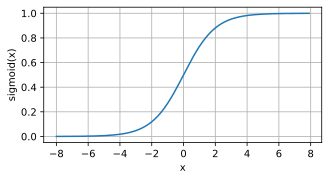

In [21]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

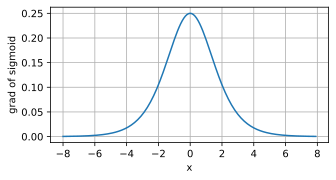

In [22]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

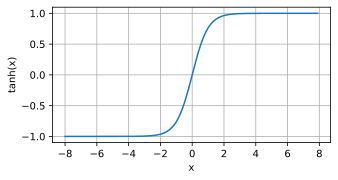

In [23]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

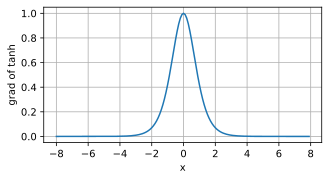

In [24]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

In [13]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [14]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [15]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [16]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [17]:
loss = nn.CrossEntropyLoss()

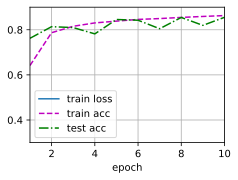

In [18]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

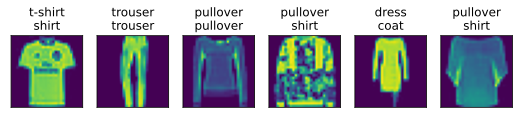

In [19]:
d2l.predict_ch3(net, test_iter)

In [4]:
import math
import numpy as np
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [8]:
import torch
# NumPyndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 1.2422],
         [-0.4316]]),
 tensor([[ 1.0000e+00,  1.2422e+00,  7.7158e-01,  3.1950e-01,  9.9223e-02,
           2.4652e-02,  5.1039e-03,  9.0576e-04,  1.4065e-04,  1.9413e-05,
           2.4116e-06,  2.7234e-07,  2.8193e-08,  2.6940e-09,  2.3904e-10,
           1.9797e-11,  1.5370e-12,  1.1231e-13,  7.7512e-15,  5.0678e-16],
         [ 1.0000e+00, -4.3156e-01,  9.3124e-02, -1.3396e-02,  1.4453e-03,
          -1.2475e-04,  8.9730e-06, -5.5320e-07,  2.9843e-08, -1.4310e-09,
           6.1757e-11, -2.4229e-12,  8.7137e-14, -2.8927e-15,  8.9170e-17,
          -2.5655e-18,  6.9199e-20, -1.7567e-21,  4.2118e-23, -9.5666e-25]]),
 tensor([5.8120, 3.9802]))

In [12]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [13]:
def train(train_features, test_features, train_labels, test_labels,num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式特征中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.001)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 4.974718   1.1778128 -3.3722236  5.6312275]]


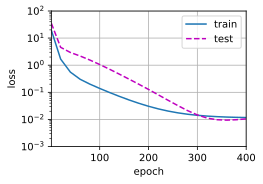

In [17]:
import torch.nn as nn
import d2l.torch as d2l
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

In [34]:
import torch
import torch.nn as nn
x_input=torch.tensor([[-0.5025, -0.7391, -1.5212],
        [ 0.2006, -0.3387,  0.5888],
        [ 0.4704,  0.0346, -1.7063]])#随机生成输入
print('x_input:\n',x_input)
y_target=torch.tensor([1,2,0])#设置输出具体值 print('y_target\n',y_target)

#计算输入softmax，此时可以看到每一行加到一起结果都是1
softmax_func=nn.Softmax(dim=1)
soft_output=softmax_func(x_input)
print('soft_output:\n',soft_output)

#在softmax的基础上取log
log_output=torch.log(soft_output)
print('log_output:\n',log_output)

#对比softmax与log的结合与nn.LogSoftmaxloss(负对数似然损失)的输出结果，发现两者是一致的。
logsoftmax_func=nn.LogSoftmax(dim=1)
logsoftmax_output=logsoftmax_func(x_input)
print('logsoftmax_output:\n',logsoftmax_output)

#pytorch中关于NLLLoss的默认参数配置为：reducetion=True、size_average=True
nllloss_func=nn.NLLLoss()
nlloss_output=nllloss_func(logsoftmax_output,y_target)
print('nlloss_output:\n',nlloss_output)

#直接使用pytorch中的loss_func=nn.CrossEntropyLoss()看与经过NLLLoss的计算是不是一样
crossentropyloss=nn.CrossEntropyLoss()
crossentropyloss_output=crossentropyloss(x_input,y_target)
print('crossentropyloss_output:\n',crossentropyloss_output.detach())

x_input:
 tensor([[-0.5025, -0.7391, -1.5212],
        [ 0.2006, -0.3387,  0.5888],
        [ 0.4704,  0.0346, -1.7063]])
soft_output:
 tensor([[0.4650, 0.3671, 0.1679],
        [0.3271, 0.1907, 0.4822],
        [0.5681, 0.3674, 0.0644]])
log_output:
 tensor([[-0.7656, -1.0022, -1.7843],
        [-1.1176, -1.6569, -0.7294],
        [-0.5654, -1.0012, -2.7421]])
logsoftmax_output:
 tensor([[-0.7656, -1.0022, -1.7843],
        [-1.1176, -1.6569, -0.7294],
        [-0.5654, -1.0012, -2.7421]])
nlloss_output:
 tensor(0.7657)
crossentropyloss_output:
 tensor(0.7657)


In [30]:
crossentropyloss_output.mean()

tensor(0.7657)

In [36]:
crossentropyloss_output.sum()

tensor(0.7657)

weight: [[3.3886368 3.4840264]]


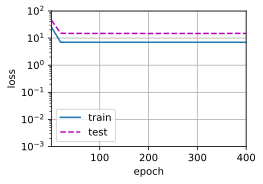

In [37]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])


In [38]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [43]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

20

In [44]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

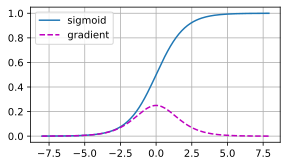

In [45]:
#dl 中各种地方都会用到mask，泛化模型，减小偏差
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [2]:
import torch.nn as nn
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(20,256)
        self.out = nn.Linear(256,10)

    def forward(self,X):
        return self.out(F.relu(self.hidden(X)))

In [3]:
mlp = MLP()
X = torch.rand(2, 20)
mlp(X)

tensor([[-0.1412, -0.1292,  0.0515, -0.0332,  0.3207, -0.2948,  0.1140, -0.0931,
          0.1581, -0.1020],
        [-0.1892, -0.1280,  0.2344,  0.0671,  0.4364, -0.3917,  0.1114, -0.0770,
          0.1157, -0.0603]], grad_fn=<AddmmBackward>)

In [9]:
class MySequences(nn.Module):
    def __init__(self,*args):
        super(MySequences, self).__init__()
        for idx,module in enumerate(args):
            self._modules[str(idx)] = module

    def forward(self,X):
        for block in self._modules.values():
            X = block(X)
        return X

In [11]:
class FixedHanddenMLP(nn.Module):
    def __init__(self):
        super(FixedHanddenMLP, self).__init__()
        # 不计算梯度的随机权重参数。因此其在训练期间保持不变
        self.rand_weight = torch.rand((20, 20), requires_grad=False)
        self.linear = nn.Linear(20, 20)

    def forward(self, X):
        X = self.linear(X)
        # 使用创建的常量参数以及relu和mm函数
        X = F.relu(torch.mm(X, self.rand_weight) + 1)
        # 复用全连接层。这相当于两个全连接层共享参数
        X = self.linear(X)
        # 控制流
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

In [13]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(20, 64), nn.ReLU(),
                                 nn.Linear(64, 32), nn.ReLU())
        self.linear = nn.Linear(32, 16)

    def forward(self, X):
        return self.linear(self.net(X))

chimera = nn.Sequential(NestMLP(), nn.Linear(16, 20), FixedHanddenMLP())
chimera(X)

tensor(0.0764, grad_fn=<SumBackward0>)

In [14]:
import torch
from torch import nn

net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 1))
X = torch.rand(size=(2, 4))
net(X)

tensor([[-0.1782],
        [-0.1226]], grad_fn=<AddmmBackward>)

In [16]:
net[2].state_dict()

OrderedDict([('weight',
              tensor([[ 0.1809, -0.0981, -0.0295,  0.1142,  0.0593, -0.0777,  0.2445, -0.2702]])),
             ('bias', tensor([-0.2496]))])

In [17]:
print(type(net[2].bias))
print(net[2].bias)
print(net[2].bias.data)

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.2496], requires_grad=True)
tensor([-0.2496])


In [19]:
net[2].weight.grad == None

True

In [20]:
print(*[(name, param.shape) for name, param in net[0].named_parameters()])
print(*[(name, param.shape) for name, param in net.named_parameters()])

('weight', torch.Size([8, 4])) ('bias', torch.Size([8]))
('0.weight', torch.Size([8, 4])) ('0.bias', torch.Size([8])) ('2.weight', torch.Size([1, 8])) ('2.bias', torch.Size([1]))


In [21]:
def init_constant(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 1)
        nn.init.zeros_(m.bias)
net.apply(init_constant)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([1., 1., 1., 1.]), tensor(0.))

In [25]:
a = nn.Linear(10,20)
[(name, param.shape) for name, param in a.named_parameters()][0]

('weight', torch.Size([20, 10]))

In [26]:
net[0].weight.data[0]

tensor([1., 1., 1., 1.])

In [10]:
import torch
import torch.nn.functional as F
from torch import nn


class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean(axis=0)

In [11]:
layer = CenteredLayer()
data = torch.randint(1,4,size=(3,2),dtype=torch.float)
data

tensor([[2., 2.],
        [3., 1.],
        [3., 1.]])

In [12]:
layer(data)

tensor([[-0.6667,  0.6667],
        [ 0.3333, -0.3333],
        [ 0.3333, -0.3333]])

In [13]:
data.mean(axis=0)

tensor([2.6667, 1.3333])

In [14]:
net = nn.Sequential(nn.Linear(8, 128), CenteredLayer())

In [15]:
Y = net(torch.rand(4, 8))
Y.mean()

tensor(-2.9104e-10, grad_fn=<MeanBackward0>)

In [16]:
from torch import nn
class MyLinear(nn.Module):
    def __init__(self,in_units,units):
        super(MyLinear, self).__init__()
        self.weight = nn.Parameter(torch.randn(in_units,units))
        self.bias = nn.Parameter(torch.randn(units))

    def forward(self,X):
        linear = torch.matmul(X,self.weight.data)+self.bias.data
        return F.relu(linear)

In [17]:
linear = MyLinear(5,3)
linear.weight

Parameter containing:
tensor([[-0.6636, -0.5599, -0.0682],
        [-1.1635,  0.3368,  0.7726],
        [ 0.7790,  0.2248, -1.2837],
        [ 0.5841, -0.4680,  0.2658],
        [-0.7980, -0.0322,  0.5759]], requires_grad=True)

In [1]:
import os,sys
os.chdir(sys.path[0])

In [7]:
import torch
from torch import nn
from torch.nn import functional as F

x = torch.arange(4,requires_grad=True,dtype=torch.float)
torch.save(x, 'x-file')

In [8]:
torch.load('x-file')

tensor([0., 1., 2., 3.], requires_grad=True)

In [9]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))

net = MLP()
X = torch.randn(size=(2, 20))
Y = net(X)

In [11]:
torch.save(net.state_dict(),"net.params")

In [13]:
mlp = MLP()
mlp.load_state_dict(torch.load('net.params'))
mlp.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [15]:
Y == mlp(X)

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [16]:
import torch
from torch import nn

torch.device('cpu'), torch.device('cuda'), torch.device('cuda:1')

(device(type='cpu'), device(type='cuda'), device(type='cuda', index=1))

In [17]:
torch.cuda.is_available()

False

In [18]:
torch.cuda.device_count()


0

In [19]:
Y.device

device(type='cpu')

In [21]:
Y.data

tensor([[ 0.5267,  0.5121,  0.0980,  0.0416,  0.0239, -0.0918, -0.0216, -0.1628,
          0.1297, -0.3868],
        [ 0.0777, -0.1231,  0.2175, -0.2705, -0.1024,  0.0919, -0.3352, -0.1901,
          0.2613, -0.2838]])

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

def corr2d(X,K):
    h,w = K.shape
    Y = torch.zeros(X.shape[0]-h+1,X.shape[1]-w+1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (X[i:i+h,j:j+w]*K).sum()
    return Y

class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [2]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [5]:
K = torch.tensor([[1.0, -1.0]])
Y = corr2d(X, K)

In [6]:
# 构造一个二维卷积层，它具有1个输出通道和形状为（1，2）的卷积核
conv2d = nn.Conv2d(1,1, kernel_size=(1, 2), bias=False)

# 这个二维卷积层使用四维输入和输出格式（批量大小、通道、高度、宽度），
# 其中批量大小和通道数都为1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # 学习率

for i in range(10):
    y_hat = conv2d(X)
    l = (y_hat-Y)**2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:]-=lr*conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i+1}, loss {l.sum():.3f}')

epoch 2, loss 1.230
epoch 4, loss 0.313
epoch 6, loss 0.096
epoch 8, loss 0.034
epoch 10, loss 0.013


In [9]:
id(conv2d.weight.data.detach)

1689428680272

In [8]:
id(conv2d.weight.data)

1689430753792

In [2]:
net = nn.Sequential(
    nn.Conv2d(1,6,kernel_size=5,padding=2),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Conv2d(6,16,kernel_size=5),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Flatten(),
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,84),
    nn.ReLU(),
    nn.Linear(84,10)
)

In [3]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)


In [4]:
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,":",X.shape)

Conv2d : torch.Size([1, 6, 28, 28])
ReLU : torch.Size([1, 6, 28, 28])
AvgPool2d : torch.Size([1, 6, 14, 14])
Conv2d : torch.Size([1, 16, 10, 10])
ReLU : torch.Size([1, 16, 10, 10])
AvgPool2d : torch.Size([1, 16, 5, 5])
Flatten : torch.Size([1, 400])
Linear : torch.Size([1, 120])
ReLU : torch.Size([1, 120])
Linear : torch.Size([1, 84])
ReLU : torch.Size([1, 84])
Linear : torch.Size([1, 10])


In [1]:
import torch

In [4]:
X = torch.randint(1,5,size=(3,4),dtype=torch.float)

In [6]:
X,X.mean(dim=0,keepdim=True)

(tensor([[2., 3., 4., 1.],
         [4., 4., 4., 3.],
         [2., 2., 2., 2.]]),
 tensor([[2.6667, 3.0000, 3.3333, 2.0000]]))

In [7]:
X = torch.randint(1,5,size=(2,3,4),dtype=torch.float)


TypeError: mean() received an invalid combination of arguments - got (dim=float, keepdim=bool, ), but expected one of:
 * (*, torch.dtype dtype)
      didn't match because some of the keywords were incorrect: dim, keepdim
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)


In [8]:
X,X.mean(dim=(0,2),keepdim=True)

(tensor([[[4., 1., 4., 2.],
          [3., 2., 2., 4.],
          [2., 4., 2., 2.]],
 
         [[3., 4., 2., 4.],
          [2., 1., 4., 2.],
          [4., 2., 3., 4.]]]),
 tensor([[[3.0000],
          [2.5000],
          [2.8750]]]))

In [23]:
Y = torch.tensor([[[3.0000],[2.5000],[2.8750]]])

Y.shape

torch.Size([1, 3, 1])

In [32]:
import torch
from torch import nn
from d2l import torch as d2l

def batch_norm(X,gamma,beta,moving_mean,moving_var,eps,momentum):
    if not torch.is_grad_enabled(X):
        X_hat = (X-moving_mean)/torch.sqrt(moving_var+eps)
    else:
        assert len(X.shape) in (2,4)
        if len(X.shape) == 2:
            mean = X.mean(dim=0)
            var = ((X - mean)**2).mean(dim=0)
        else:
            mean = X.mean(dim=(0,2,3),keepdim=True)
            var = ((X-mean)**2).mean(dim=(0,2,3),keepdim=True)
        X_hat = (X-mean)/torch.sqrt(var+eps)
        moving_mean = momentum * moving_mean +(1-momentum)*mean
        moving_var = momentum * moving_var +(1-momentum)*var
    Y = gamma * X_hat+beta
    return Y,moving_mean.data,moving_var.data

class BatchNorm(nn.Module):
    def __init__(self,num_features,num_dims):
        super(BatchNorm, self).__init__()
        if num_dims == 2:
            shape = (1,num_features)
        else:
            shape = (1,num_features,1,1)
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.zeros(shape)

    def forward(self,X):
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        Y,self.moving_mean,self.moving_var = batch_norm(X,self.gamma,self.beta,self.moving_mean,self.moving_var,eps=1e-5,momentum=0.9)
        return Y

2712424475328